# Tensor 编程大作业-模板匹配

学习了tensor的基础操作之后，我们可以使用tensor来完成一项简单的模板匹配问题。首先读取一幅图像以及一幅模板图像。

(-0.5, 47.5, 47.5, -0.5)

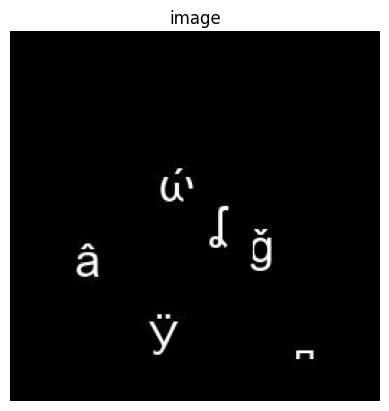

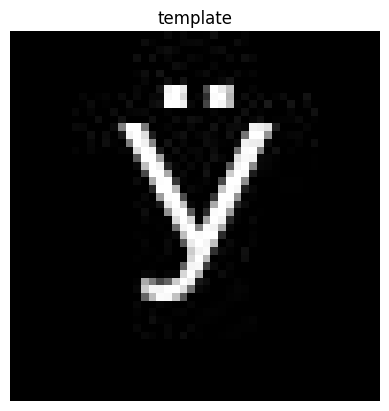

In [20]:
import cv2
import torch
import matplotlib.pyplot as plt
image = cv2.cvtColor(cv2.imread("image.jpg"), cv2.COLOR_BGR2GRAY)
template = cv2.cvtColor(cv2.imread("template.jpg"), cv2.COLOR_BGR2GRAY)
plt.figure()
plt.imshow(image, cmap='gray')
plt.title('image')
plt.axis('off')
plt.figure()
plt.imshow(template, cmap='gray')
plt.title('template')
plt.axis('off')

OpenCV读取的图像是numpy的ndarrays格式，需要将其转换为tensor。

In [21]:
image = torch.from_numpy(image)
template = torch.from_numpy(template)

获取图像和模板图像的尺寸，由于二者都是正方形，因此只需要得到图像和模板图像的边长。

In [22]:
image_shape = image.size(0)
template_shape = template.size(0)

开始进行模板匹配。对图像进行遍历，按照从左到右、从上到下的顺序依次取出和模板同样大小的正方形区域（切片），对取出的区域计算与模板的相似度。对于两幅同样大小的图像$X$和$Y$，二者的相似度s可以按照如下公式计算：
$X_{norm} = \sqrt{\sum_i\sum_j X_{i,j}*X_{i,j}}$,
$Y_{norm} = \sqrt{\sum_i\sum_j Y_{i,j}*Y_{i,j}}$,
$s=\frac{\sum_i\sum_j X_{i,j}*Y_{i,j}}{X_{norm} * Y_{norm}}$.

In [23]:
max_similarity = 0
matched_position = None
for i in range(image_shape - template_shape):
    for j in range(image_shape - template_shape):
        i_end = i + template_shape
        j_end = j + template_shape
        image_crop = image[i:i_end, j:j_end]
        image_crop_norm = torch.sqrt(torch.sum(torch.square(image_crop)))
        template_norm = torch.sqrt(torch.sum(torch.square(template)))
        similarity = torch.sum(image_crop * template) / (image_crop_norm * template_norm)
        if similarity > max_similarity:
            matched_position = (j, i)
            max_similarity = similarity

最后对于最大相似度大于0.8的匹配结果，认为匹配成功，对匹配的位置进行可视化之前，需要先将图像从tensor转化为numpy的ndarrays格式。

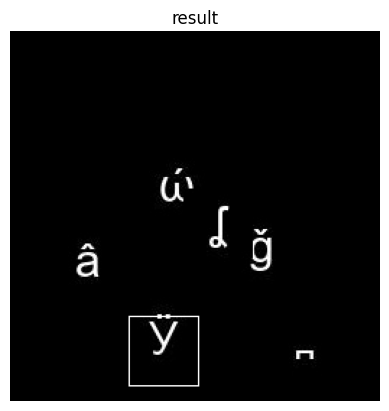

In [24]:
if max_similarity <= 0.8:
    print("未匹配成功")
else:
    image = image.numpy()
    image = cv2.rectangle(image, matched_position, (matched_position[0] + template_shape, matched_position[1] + template_shape), color=255)
    cv2.imwrite("result.jpg", image)
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title('result')
    plt.axis('off')
    